In [1]:
import pandas as pd
import numpy as np
contenido= pd.read_csv('BaseTibamoa10092022.txt',sep='\t',encoding='latin1')

In [2]:
ct=contenido
#Conversión de Nan a No aplica
ct=ct.fillna("No aplica")
columnas=ct.columns

In [3]:
#Creación de dummies
ctdummies= pd.get_dummies(ct, columns=['GENERO','ACTIVIDAD_ECONOMICA', 'ESTADO_CIVIL',
                                      'RANGO EDAD','Frecuencia_uso_CA','Uso_ppal_CA',
                                      'Principal_uso_Cred Consum','Principal_uso_TC_Tibapuntos',
                                      'Identificacion_afirm_comunicacion','Identificacion_afirm_conocimiento',
                                      'Identificacion_afirm_disp_compra','Que_impotante_Satisfaccion_EF',
                                      'Busqueda_info_producto','Solicitud_productos',
                                      'Consulta_info_y_caracteristicas_prod',
                                      'Transacciones (compras, pagos, abonos, etc.)',
                                      'modo_Realizar_consulta_o_requerimiento', 'Radicar_queja_reclamo',
                                      'Primer_canal_alternativo', 'Disposicion_recibir_comunic_Tibamoa',
                                      'Informacion de beneficios', 'Informacion de ofertas comerciales',
                                      'Notificaciones de estados de tramites',
                                      'Si Tibamoa excelente, estaria dispuesto a:',
                                      'Si igual tiempo seguiria cliente','Banco Principal',
                                      'Billetera digital preferida', 'Que_valora de bco ppal'])
        

In [4]:
#Acondicionamiento de los datos -------------------------------------------------------------------------
data = ctdummies
data.set_index("ID")

#Asignación de números diferentes para categorias no conocidas 
rep = ['Web B Tibamoa','App B Tibamoa','Banca en linea B Tibamoa','Chat WhatsApp B Tibamoa','Telefono B Tibamoa',
       'Cajeros electronicos','Oficinas B Tibamoa','Correo electronico B Tibamoa']
for r in rep:
  data[r].mask(data[r] == 'No uso este canal', -99, inplace=True)
  data[r].mask(data[r] == 'No conozco este canal', -98, inplace=True)

#Eliminación de columnas  
drop = [
    #Eliminación de indices y fechas
    'ID','ID_Consutoriamigo','APERTURA_DT','FECHA_ENCUESTA','BASE',
    #Variables que se volvieron dummies
    'Productos_Tibamoa','2_aspectos_mas_importantes_escoger_ entidad_financiera','Otras entidades que lo atienden']
data = data.drop(drop,axis=1)

# Conversión de tipo de datos a numerico
data1=data
data1[["Web B Tibamoa","App B Tibamoa","Banca en linea B Tibamoa","Chat WhatsApp B Tibamoa","Telefono B Tibamoa",
"Cajeros electronicos","Oficinas B Tibamoa","Correo electronico B Tibamoa"]] = data1[["Web B Tibamoa","App B Tibamoa","Banca en linea B Tibamoa","Chat WhatsApp B Tibamoa","Telefono B Tibamoa",
"Cajeros electronicos","Oficinas B Tibamoa","Correo electronico B Tibamoa"]].apply(pd.to_numeric)


In [5]:
#Elimimación de una columna de todas las dummies generadas-------------------------------------------------------------
deleted_colums = ['dummie prod Otro',
                  'dummie 2 Otro',
                  'dummie_otras_entidades_atienden_Otro',
                  'GENERO_MASCULINO',
                  'ACTIVIDAD_ECONOMICA_DESEMPLEADO',
                  'ESTADO_CIVIL_SOLTERO/A',
                  'RANGO EDAD_MAYOR 60',
                  'Frecuencia_uso_CA_Nunca',
                  'Uso_ppal_CA_Otro',
                  'Principal_uso_Cred Consum_Otro',
                  'Principal_uso_TC_Tibapuntos_Otro',
                  'Identificacion_afirm_conocimiento_Me gustaria entender en mas detalle como funciona los productos financieros',
                  'Identificacion_afirm_disp_compra_Para desarrollar los proyectos que tengo planeados en los proximos dos annos, necesito adquirir productos financieros adicionales.',
                  'Que_impotante_Satisfaccion_EF_Otro',
                  'Busqueda_info_producto_No he vivido este momento',
                  'Solicitud_productos_No he vivido este momento',
                  'Consulta_info_y_caracteristicas_prod_No he vivido este momento',
                  'Transacciones (compras, pagos, abonos, etc.)_Telefono',
                  'modo_Realizar_consulta_o_requerimiento_No he vivido este momento',
                  'Radicar_queja_reclamo_No he vivido este momento',
                  'Primer_canal_alternativo_Otro',
                  'Disposicion_recibir_comunic_Tibamoa_No deseo recibir ningun tipo de comunicacion',
                  'Informacion de beneficios_No aplica',
                  'Informacion de ofertas comerciales_No aplica',
                  'Notificaciones de estados de tramites_No aplica',
                  'Si Tibamoa excelente, estaria dispuesto a:_No hacer nada al respecto',
                  'Si igual tiempo seguiria cliente_Mas de 7 annos',
                  'Banco Principal_Otro',
                  'Billetera digital preferida_No aplica',
                  'Que_valora de bco ppal_Otro']

#Dataframe sin columnas anteriores
clean_df = data1.drop(deleted_colums, axis=1)

#Nombre de todas las columnas dummies
dummies_all = clean_df.columns[clean_df.isin([0,1]).all()]

#Nombre de todas las columnas numericas
numeric_all = []
for c in clean_df.columns:
  if c not in dummies_all:
    numeric_all.append(c)

display(clean_df.head(5))

EDAD  ESTRATO  Probabilidad_Recomendacion  Web B Tibamoa  App B Tibamoa  \
0    24        3                          10             10             10   
1    29        3                          10             10             10   
2    29        3                           9            -99             10   
3    27        3                           0              1              1   
4    28        3                          10             10             10   

   Banca en linea B Tibamoa  Chat WhatsApp B Tibamoa  Telefono B Tibamoa  \
0                        10                       10                  10   
1                        10                       10                  10   
2                       -99                        9                 -99   
3                         1                        1                   1   
4                        10                       10                 -99   

   Cajeros electronicos  Oficinas B Tibamoa  ...  \
0                    10                  10  ...   
1                    10                  10  ...   
2                    10                   9  ...   
3                     1                   1  ...   
4                    10                  10  ...   

   Banco Principal_Scotiabank Colpatria  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Billetera digital preferida_Daviplata  Billetera digital preferida_Nubank  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   Billetera digital preferida_Rappipay  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Que_valora de bco ppal_Facilidad para interactuar con los canales de atencion  \
0                                                  0                               
1                                                  1                               
2                                                  1                               
3                                                  0                               
4                                                  0                               

   Que_valora de bco ppal_Las tasas y comisiones de los productos  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  1                

   Que_valora de bco ppal_Los canales digitales  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Que_valora de bco ppal_Programa de puntos y alianzas  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Que_valora de bco ppal_Respuesta oportuna ante requerimientos  \
0                                                  1               
1                                              

In [6]:
# Estandarizamos los datos
mu = data1.mean()
sigma = data.std()
Z = (data1 - mu)/sigma

#Solo se deben tomar las variables numéricas para la estandarización 
estandarizado_df = clean_df.copy()
for name_column in numeric_all:
  estandarizado_df[name_column] = Z[name_column]

display(estandarizado_df.head(5))

EDAD   ESTRATO  Probabilidad_Recomendacion  Web B Tibamoa  \
0 -1.671643 -0.153944                    0.668374       0.528485   
1 -1.275213 -0.153944                    0.668374       0.528485   
2 -1.275213 -0.153944                    0.320431      -2.084395   
3 -1.433785 -0.153944                   -2.811055       0.312743   
4 -1.354499 -0.153944                    0.668374       0.528485   

   App B Tibamoa  Banca en linea B Tibamoa  Chat WhatsApp B Tibamoa  \
0       0.382590                  0.609123                 0.544560   
1       0.382590                  0.609123                 0.544560   
2       0.382590                 -1.766052                 0.520158   
3       0.101103                  0.413008                 0.324942   
4       0.382590                  0.609123                 0.544560   

   Telefono B Tibamoa  Cajeros electronicos  Oficinas B Tibamoa  ...  \
0            0.896829              0.600659            0.370000  ...   
1            0.896829              0.600659            0.370000  ...   
2           -1.199231              0.600659            0.333375  ...   
3            0.723760              0.405286            0.040373  ...   
4           -1.199231              0.600659            0.370000  ...   

   Banco Principal_Scotiabank Colpatria  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Billetera digital preferida_Daviplata  Billetera digital preferida_Nubank  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   Billetera digital preferida_Rappipay  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Que_valora de bco ppal_Facilidad para interactuar con los canales de atencion  \
0                                                  0                               
1                                                  1                               
2                                                  1                               
3                                                  0                               
4                                                  0                               

   Que_valora de bco ppal_Las tasas y comisiones de los productos  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  1                

   Que_valora de bco ppal_Los canales digitales  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Que_valora de bco ppal_Programa de puntos y alianzas  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Que_valora de bco ppal_Respuesta oportuna ante requerimientos  \
0                                                  1               
1                    

In [7]:
#Proceso de SVD-------------------------------------------------------------------------
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd

svd = TruncatedSVD(n_components=62, n_iter=7, random_state=42)
reduced_data = svd.fit_transform(estandarizado_df)

i=1; columnas=[]
while i<=62:
    columnas.append('C'+str(i))
    i=i+1

df_reduced_data = pd.DataFrame(reduced_data, columns = columnas)

#print(svd.explained_variance_ratio_)
explained_variance = svd.explained_variance_ratio_.sum()
print('-----------------------------------------------------------------------')
print("Porcentaje de varianza explicada " + str(explained_variance *100)+'%')
print('-----------------------------------------------------------------------')

#Con 7 componentes se explica el 91.36% de la información 
print(df_reduced_data.head())

-----------------------------------------------------------------------
Porcentaje de varianza explicada 90.33832137106258%
-----------------------------------------------------------------------
         C1        C2        C3        C4        C5        C6        C7  \
0  2.951819 -2.117921 -0.304560 -0.749922 -0.758902  0.749867 -0.590374   
1  3.413738 -2.231893  0.410606 -0.316005 -0.228559  0.078875 -0.691784   
2  3.041681  1.528197  1.582283 -0.688296 -1.774675  0.593518  1.742817   
3  1.734810 -1.997288 -1.149829  1.416142 -1.878194  0.439720  0.210355   
4  3.149517 -1.475518  1.314153 -0.537536 -0.787252  0.617639  0.076926   

         C8        C9       C10  ...       C53       C54       C55       C56  \
0 -0.167459  0.423445  0.854988  ...  0.266443  0.774372 -0.730667 -0.219076   
1  0.372276 -0.026504  1.221814  ... -0.257409 -0.237651  0.282019  0.220572   
2  0.261897  0.341149 -1.360619  ... -0.645290 -0.476542 -0.170504  0.249782   
3  0.833514  0.465520 -0.488551  

In [8]:
#Proceso de PCA-------------------------------------------------------------------------
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=61)
componentesPrincipales = pca.fit_transform(estandarizado_df)
i=0
columnas=[]
while i<61:
    columnas.append('CP'+str(i))
    i=i+1

pca_dt = pd.DataFrame(data = componentesPrincipales, columns = columnas, index=data1.index)

#print('Estandarizado')
#print(pca_dt.head())

#print(pca.explained_variance_ratio_)
ratio_de_varianza_explicada=pca.explained_variance_ratio_

i=1
while i <=len(ratio_de_varianza_explicada):
    print('CP',i,": ",sum(ratio_de_varianza_explicada[0:i]))
    i=i+1

CP 1 :  0.10573182520185775
CP 2 :  0.16893347652145735
CP 3 :  0.21734616508708673
CP 4 :  0.26092299580738343
CP 5 :  0.2983404680588203
CP 6 :  0.33216670153667516
CP 7 :  0.3623081151025493
CP 8 :  0.3890763794186854
CP 9 :  0.41501592786820096
CP 10 :  0.4389281367443045
CP 11 :  0.46079558031726225
CP 12 :  0.4820062490005528
CP 13 :  0.502119446066165
CP 14 :  0.521358415247089
CP 15 :  0.5392607835843479
CP 16 :  0.5558647434881943
CP 17 :  0.5723572124167401
CP 18 :  0.587733607090828
CP 19 :  0.6025012909404047
CP 20 :  0.6163576122452338
CP 21 :  0.6297623874474875
CP 22 :  0.6421839811413106
CP 23 :  0.6542635748028309
CP 24 :  0.6657612159282713
CP 25 :  0.6769258866675314
CP 26 :  0.6877158468806571
CP 27 :  0.6981806121818778
CP 28 :  0.7079876826343249
CP 29 :  0.717383962323208
CP 30 :  0.7266238668672752
CP 31 :  0.735583207945675
CP 32 :  0.7441631812124011
CP 33 :  0.7525170402680126
CP 34 :  0.760406367969428
CP 35 :  0.7681567316943081
CP 36 :  0.7758119688568909


In [9]:
import plotly.express as px # Cargamos el paquete plotly para hacer gráficas interactivas.

fig = px.scatter(pca_dt, x = "CP1", y = "CP2",
    text = pca_dt.index.values)
fig.update_traces(textposition = 'top center')
fig.show()

fig = px.scatter(pca_dt, x = "CP2", y = "CP3",
    text = pca_dt.index.values)
fig.update_traces(textposition = 'top center')
fig.show()

fig = px.scatter(pca_dt, x = "CP3", y = "CP4",
    text = pca_dt.index.values)
fig.update_traces(textposition = 'top center')
fig.show()

In [10]:
print(type(pca.components_[0]))

componentes=np.stack((pca.components_[0], pca.components_[1],pca.components_[2],
                pca.components_[3], pca.components_[4],pca.components_[5],
                pca.components_[6], pca.components_[7],pca.components_[8],
                pca.components_[9], pca.components_[4],pca.components_[10]), 
               axis=1, out=None)

dfcomponentes=pd.DataFrame(componentes)
dfcomponentes['variables']=estandarizado_df.columns
dfcomponentes=dfcomponentes.set_index('variables')
dfcomponentes

<class 'numpy.ndarray'>


0         1  \
variables                                                                
EDAD                                                0.267518 -0.258309   
ESTRATO                                             0.035597 -0.069582   
Probabilidad_Recomendacion                          0.054456  0.316173   
Web B Tibamoa                                      -0.276847 -0.203805   
App B Tibamoa                                      -0.293577  0.379094   
...                                                      ...       ...   
Que_valora de bco ppal_Las tasas y comisiones d... -0.024474  0.028269   
Que_valora de bco ppal_Los canales digitales        0.009534  0.024588   
Que_valora de bco ppal_Programa de puntos y ali... -0.058827  0.002872   
Que_valora de bco ppal_Respuesta oportuna ante ...  0.019586 -0.039462   
Que_valora de bco ppal_Variedad de productos fi... -0.003773  0.006680   

                                                           2         3  \
variables                                                                
EDAD                                                0.108943  0.453321   
ESTRATO                                             0.301488  0.454928   
Probabilidad_Recomendacion                         -0.504559  0.323974   
Web B Tibamoa                                       0.056306  0.176453   
App B Tibamoa                                       0.030288  0.305051   
...                                                      ...       ...   
Que_valora de bco ppal_Las tasas y comisiones d... -0.043063  0.000218   
Que_valora de bco ppal_Los canales digitales        0.020845  0.000909   
Que_valora de bco ppal_Programa de puntos y ali... -0.021864 -0.010587   
Que_valora de bco ppal_Respuesta oportuna ante ...  0.009602 -0.027021   
Que_valora de bco ppal_Variedad de productos fi... -0.021890  0.023082   

                                                           4         5  \
variables                                                                
EDAD                                               -0.368319  0.201543   
ESTRATO                                             0.475379  0.355905   
Probabilidad_Recomendacion                          0.191206 -0.018997   
Web B Tibamoa                                       0.391869 -0.401379   
App B Tibamoa                                      -0.049840  0.014548   
...                                                      ...       ...   
Que_valora de bco ppal_Las tasas y comisiones d... -0.008789 -0.030683   
Que_valora de bco ppal_Los canales digitales       -0.010881  0.023467   
Que_valora de bco ppal_Programa de puntos y ali...  0.061200 -0.000126   
Que_valora de bco ppal_Respuesta oportuna ante ... -0.043649  0.030594   
Que_valora de bco ppal_Variedad de productos fi...  0.022861  0.007553   

                                                           6         7  \
variables                                                                
EDAD                                               -0.079360 -0.355516   
ESTRATO                                             0.273587  0.258012   
Probabilidad_Recomendacion                         -0.278791 -0.132913   
Web B Tibamoa                                       0.110130 -0.378856   
App B Tibamoa                                       0.080579  0.101969   
...                                                      ...       ...   
Que_valora de bco ppal_Las tasas y comisiones d... -0.034433  0.091470   
Que_valora de bco ppal_Los canales digitales       -0.005383  0.022316   
Que_valora de bco ppal_Programa de puntos y ali... -0.030368 -0.053659   
Que_valora de bco ppal_Respuesta oportuna ante ...  0.042179 -0.048540   
Que_valora de bco ppal_Variedad de productos fi... -0.006673 -0.051307   

                                                           8         9  \
variables                                                                
EDAD                                                0.01950

In [11]:
for i in range (0,11):
  dfcomponentes=dfcomponentes.sort_values(by=[i], ascending=False, key=abs)
  print('CP'+str(i+1)+' ----------------------------------------------------------')
  display(dfcomponentes.head(5))

CP1 ----------------------------------------------------------


0         1         2         3  \
variables                                                              
Banca en linea B Tibamoa     -0.378547 -0.211928  0.061867  0.173688   
Correo electronico B Tibamoa -0.351876 -0.187510 -0.155484 -0.039095   
Telefono B Tibamoa           -0.346682 -0.311973 -0.044828  0.132844   
Chat WhatsApp B Tibamoa      -0.343715  0.219787  0.313066 -0.014747   
Cajeros electronicos         -0.328309 -0.065103 -0.185654 -0.164584   

                                     4         5         6         7  \
variables                                                              
Banca en linea B Tibamoa     -0.063730 -0.222602 -0.269811  0.130847   
Correo electronico B Tibamoa  0.041664  0.230593  0.084365 -0.082288   
Telefono B Tibamoa           -0.266984 -0.047110 -0.111868  0.278173   
Chat WhatsApp B Tibamoa      -0.158947  0.061825 -0.111572 -0.268758   
Cajeros electronicos          0.013478  0.557539 -0.088745 -0.077241   

                                     8         9        10        11  
variables                                                             
Banca en linea B Tibamoa     -0.104742 -0.194884 -0.063730  0.011984  
Correo electronico B Tibamoa  0.501313  0.205767  0.041664  0.091106  
Telefono B Tibamoa            0.217098 -0.116510 -0.266984 -0.064313  
Chat WhatsApp B Tibamoa      -0.172089  0.153611 -0.158947 -0.392086  
Cajeros electronicos         -0.283543 -0.241367  0.013478 -0.014616

CP2 ----------------------------------------------------------


0         1         2         3         4  \
variables                                                                      
App B Tibamoa              -0.293577  0.379094  0.030288  0.305051 -0.049840   
Probabilidad_Recomendacion  0.054456  0.316173 -0.504559  0.323974  0.191206   
Telefono B Tibamoa         -0.346682 -0.311973 -0.044828  0.132844 -0.266984   
Oficinas B Tibamoa         -0.080569 -0.271419 -0.483509  0.080031 -0.120967   
EDAD                        0.267518 -0.258309  0.108943  0.453321 -0.368319   

                                   5         6         7         8         9  \
variables                                                                      
App B Tibamoa               0.014548  0.080579  0.101969 -0.031390  0.485687   
Probabilidad_Recomendacion -0.018997 -0.278791 -0.132913  0.284127 -0.111795   
Telefono B Tibamoa         -0.047110 -0.111868  0.278173  0.217098 -0.116510   
Oficinas B Tibamoa         -0.089280  0.528725 -0.034273 -0.281306  0.220294   
EDAD                        0.201543 -0.079360 -0.355516  0.019500 -0.005823   

                                  10        11  
variables                                       
App B Tibamoa              -0.049840  0.207590  
Probabilidad_Recomendacion  0.191206 -0.149848  
Telefono B Tibamoa         -0.266984 -0.064313  
Oficinas B Tibamoa         -0.120967 -0.235706  
EDAD                       -0.368319  0.111740

CP3 ----------------------------------------------------------


0         1         2         3         4  \
variables                                                                      
Probabilidad_Recomendacion  0.054456  0.316173 -0.504559  0.323974  0.191206   
Oficinas B Tibamoa         -0.080569 -0.271419 -0.483509  0.080031 -0.120967   
Chat WhatsApp B Tibamoa    -0.343715  0.219787  0.313066 -0.014747 -0.158947   
ESTRATO                     0.035597 -0.069582  0.301488  0.454928  0.475379   
Cajeros electronicos       -0.328309 -0.065103 -0.185654 -0.164584  0.013478   

                                   5         6         7         8         9  \
variables                                                                      
Probabilidad_Recomendacion -0.018997 -0.278791 -0.132913  0.284127 -0.111795   
Oficinas B Tibamoa         -0.089280  0.528725 -0.034273 -0.281306  0.220294   
Chat WhatsApp B Tibamoa     0.061825 -0.111572 -0.268758 -0.172089  0.153611   
ESTRATO                     0.355905  0.273587  0.258012  0.034047 -0.125725   
Cajeros electronicos        0.557539 -0.088745 -0.077241 -0.283543 -0.241367   

                                  10        11  
variables                                       
Probabilidad_Recomendacion  0.191206 -0.149848  
Oficinas B Tibamoa         -0.120967 -0.235706  
Chat WhatsApp B Tibamoa    -0.158947 -0.392086  
ESTRATO                     0.475379 -0.245629  
Cajeros electronicos        0.013478 -0.014616

CP4 ----------------------------------------------------------


0         1         2         3         4  \
variables                                                                      
ESTRATO                     0.035597 -0.069582  0.301488  0.454928  0.475379   
EDAD                        0.267518 -0.258309  0.108943  0.453321 -0.368319   
Probabilidad_Recomendacion  0.054456  0.316173 -0.504559  0.323974  0.191206   
App B Tibamoa              -0.293577  0.379094  0.030288  0.305051 -0.049840   
Web B Tibamoa              -0.276847 -0.203805  0.056306  0.176453  0.391869   

                                   5         6         7         8         9  \
variables                                                                      
ESTRATO                     0.355905  0.273587  0.258012  0.034047 -0.125725   
EDAD                        0.201543 -0.079360 -0.355516  0.019500 -0.005823   
Probabilidad_Recomendacion -0.018997 -0.278791 -0.132913  0.284127 -0.111795   
App B Tibamoa               0.014548  0.080579  0.101969 -0.031390  0.485687   
Web B Tibamoa              -0.401379  0.110130 -0.378856 -0.140560 -0.167718   

                                  10        11  
variables                                       
ESTRATO                     0.475379 -0.245629  
EDAD                       -0.368319  0.111740  
Probabilidad_Recomendacion  0.191206 -0.149848  
App B Tibamoa              -0.049840  0.207590  
Web B Tibamoa               0.391869  0.246762

CP5 ----------------------------------------------------------


0         1         2         3         4  \
variables                                                                      
ESTRATO                     0.035597 -0.069582  0.301488  0.454928  0.475379   
Web B Tibamoa              -0.276847 -0.203805  0.056306  0.176453  0.391869   
EDAD                        0.267518 -0.258309  0.108943  0.453321 -0.368319   
Telefono B Tibamoa         -0.346682 -0.311973 -0.044828  0.132844 -0.266984   
Probabilidad_Recomendacion  0.054456  0.316173 -0.504559  0.323974  0.191206   

                                   5         6         7         8         9  \
variables                                                                      
ESTRATO                     0.355905  0.273587  0.258012  0.034047 -0.125725   
Web B Tibamoa              -0.401379  0.110130 -0.378856 -0.140560 -0.167718   
EDAD                        0.201543 -0.079360 -0.355516  0.019500 -0.005823   
Telefono B Tibamoa         -0.047110 -0.111868  0.278173  0.217098 -0.116510   
Probabilidad_Recomendacion -0.018997 -0.278791 -0.132913  0.284127 -0.111795   

                                  10        11  
variables                                       
ESTRATO                     0.475379 -0.245629  
Web B Tibamoa               0.391869  0.246762  
EDAD                       -0.368319  0.111740  
Telefono B Tibamoa         -0.266984 -0.064313  
Probabilidad_Recomendacion  0.191206 -0.149848

CP6 ----------------------------------------------------------


0         1         2         3  \
variables                                                              
Cajeros electronicos         -0.328309 -0.065103 -0.185654 -0.164584   
Web B Tibamoa                -0.276847 -0.203805  0.056306  0.176453   
ESTRATO                       0.035597 -0.069582  0.301488  0.454928   
Correo electronico B Tibamoa -0.351876 -0.187510 -0.155484 -0.039095   
Banca en linea B Tibamoa     -0.378547 -0.211928  0.061867  0.173688   

                                     4         5         6         7  \
variables                                                              
Cajeros electronicos          0.013478  0.557539 -0.088745 -0.077241   
Web B Tibamoa                 0.391869 -0.401379  0.110130 -0.378856   
ESTRATO                       0.475379  0.355905  0.273587  0.258012   
Correo electronico B Tibamoa  0.041664  0.230593  0.084365 -0.082288   
Banca en linea B Tibamoa     -0.063730 -0.222602 -0.269811  0.130847   

                                     8         9        10        11  
variables                                                             
Cajeros electronicos         -0.283543 -0.241367  0.013478 -0.014616  
Web B Tibamoa                -0.140560 -0.167718  0.391869  0.246762  
ESTRATO                       0.034047 -0.125725  0.475379 -0.245629  
Correo electronico B Tibamoa  0.501313  0.205767  0.041664  0.091106  
Banca en linea B Tibamoa     -0.104742 -0.194884 -0.063730  0.011984

CP7 ----------------------------------------------------------


0         1  \
variables                                                                
Oficinas B Tibamoa                                 -0.080569 -0.271419   
Probabilidad_Recomendacion                          0.054456  0.316173   
ESTRATO                                             0.035597 -0.069582   
Banca en linea B Tibamoa                           -0.378547 -0.211928   
Notificaciones de estados de tramites_Correo el...  0.045714 -0.040050   

                                                           2         3  \
variables                                                                
Oficinas B Tibamoa                                 -0.483509  0.080031   
Probabilidad_Recomendacion                         -0.504559  0.323974   
ESTRATO                                             0.301488  0.454928   
Banca en linea B Tibamoa                            0.061867  0.173688   
Notificaciones de estados de tramites_Correo el... -0.091841  0.083282   

                                                           4         5  \
variables                                                                
Oficinas B Tibamoa                                 -0.120967 -0.089280   
Probabilidad_Recomendacion                          0.191206 -0.018997   
ESTRATO                                             0.475379  0.355905   
Banca en linea B Tibamoa                           -0.063730 -0.222602   
Notificaciones de estados de tramites_Correo el...  0.067279  0.047597   

                                                           6         7  \
variables                                                                
Oficinas B Tibamoa                                  0.528725 -0.034273   
Probabilidad_Recomendacion                         -0.278791 -0.132913   
ESTRATO                                             0.273587  0.258012   
Banca en linea B Tibamoa                           -0.269811  0.130847   
Notificaciones de estados de tramites_Correo el... -0.203901  0.097857   

                                                           8         9  \
variables                                                                
Oficinas B Tibamoa                                 -0.281306  0.220294   
Probabilidad_Recomendacion                          0.284127 -0.111795   
ESTRATO                                             0.034047 -0.125725   
Banca en linea B Tibamoa                           -0.104742 -0.194884   
Notificaciones de estados de tramites_Correo el... -0.209724  0.183813   

                                                          10        11  
variables                                                               
Oficinas B Tibamoa                                 -0.120967 -0.235706  
Probabilidad_Recomendacion                          0.191206 -0.149848  
ESTRATO                                             0.475379 -0.245629  
Banca en linea B Tibamoa                           -0.063730  0.011984  
Notificaciones de estados de tramites_Correo el...  0.067279  0.074214

CP8 ----------------------------------------------------------


0         1         2         3         4  \
variables                                                                   
Web B Tibamoa           -0.276847 -0.203805  0.056306  0.176453  0.391869   
EDAD                     0.267518 -0.258309  0.108943  0.453321 -0.368319   
Telefono B Tibamoa      -0.346682 -0.311973 -0.044828  0.132844 -0.266984   
Chat WhatsApp B Tibamoa -0.343715  0.219787  0.313066 -0.014747 -0.158947   
ESTRATO                  0.035597 -0.069582  0.301488  0.454928  0.475379   

                                5         6         7         8         9  \
variables                                                                   
Web B Tibamoa           -0.401379  0.110130 -0.378856 -0.140560 -0.167718   
EDAD                     0.201543 -0.079360 -0.355516  0.019500 -0.005823   
Telefono B Tibamoa      -0.047110 -0.111868  0.278173  0.217098 -0.116510   
Chat WhatsApp B Tibamoa  0.061825 -0.111572 -0.268758 -0.172089  0.153611   
ESTRATO                  0.355905  0.273587  0.258012  0.034047 -0.125725   

                               10        11  
variables                                    
Web B Tibamoa            0.391869  0.246762  
EDAD                    -0.368319  0.111740  
Telefono B Tibamoa      -0.266984 -0.064313  
Chat WhatsApp B Tibamoa -0.158947 -0.392086  
ESTRATO                  0.475379 -0.245629

CP9 ----------------------------------------------------------


0         1         2  \
variables                                                                    
Correo electronico B Tibamoa                 -0.351876 -0.187510 -0.155484   
Probabilidad_Recomendacion                    0.054456  0.316173 -0.504559   
Cajeros electronicos                         -0.328309 -0.065103 -0.185654   
Oficinas B Tibamoa                           -0.080569 -0.271419 -0.483509   
Informacion de beneficios_Correo electronico  0.054884 -0.033431 -0.127350   

                                                     3         4         5  \
variables                                                                    
Correo electronico B Tibamoa                 -0.039095  0.041664  0.230593   
Probabilidad_Recomendacion                    0.323974  0.191206 -0.018997   
Cajeros electronicos                         -0.164584  0.013478  0.557539   
Oficinas B Tibamoa                            0.080031 -0.120967 -0.089280   
Informacion de beneficios_Correo electronico  0.071228  0.116944 -0.003925   

                                                     6         7         8  \
variables                                                                    
Correo electronico B Tibamoa                  0.084365 -0.082288  0.501313   
Probabilidad_Recomendacion                   -0.278791 -0.132913  0.284127   
Cajeros electronicos                         -0.088745 -0.077241 -0.283543   
Oficinas B Tibamoa                            0.528725 -0.034273 -0.281306   
Informacion de beneficios_Correo electronico -0.176971  0.099131 -0.230672   

                                                     9        10        11  
variables                                                                   
Correo electronico B Tibamoa                  0.205767  0.041664  0.091106  
Probabilidad_Recomendacion                   -0.111795  0.191206 -0.149848  
Cajeros electronicos                         -0.241367  0.013478 -0.014616  
Oficinas B Tibamoa                            0.220294 -0.120967 -0.235706  
Informacion de beneficios_Correo electronico  0.145678  0.116944  0.041452

CP10 ----------------------------------------------------------


0         1         2         3  \
variables                                                              
App B Tibamoa                -0.293577  0.379094  0.030288  0.305051   
Cajeros electronicos         -0.328309 -0.065103 -0.185654 -0.164584   
Oficinas B Tibamoa           -0.080569 -0.271419 -0.483509  0.080031   
Correo electronico B Tibamoa -0.351876 -0.187510 -0.155484 -0.039095   
Banca en linea B Tibamoa     -0.378547 -0.211928  0.061867  0.173688   

                                     4         5         6         7  \
variables                                                              
App B Tibamoa                -0.049840  0.014548  0.080579  0.101969   
Cajeros electronicos          0.013478  0.557539 -0.088745 -0.077241   
Oficinas B Tibamoa           -0.120967 -0.089280  0.528725 -0.034273   
Correo electronico B Tibamoa  0.041664  0.230593  0.084365 -0.082288   
Banca en linea B Tibamoa     -0.063730 -0.222602 -0.269811  0.130847   

                                     8         9        10        11  
variables                                                             
App B Tibamoa                -0.031390  0.485687 -0.049840  0.207590  
Cajeros electronicos         -0.283543 -0.241367  0.013478 -0.014616  
Oficinas B Tibamoa           -0.281306  0.220294 -0.120967 -0.235706  
Correo electronico B Tibamoa  0.501313  0.205767  0.041664  0.091106  
Banca en linea B Tibamoa     -0.104742 -0.194884 -0.063730  0.011984

CP11 ----------------------------------------------------------


0         1         2         3         4  \
variables                                                                      
ESTRATO                     0.035597 -0.069582  0.301488  0.454928  0.475379   
Web B Tibamoa              -0.276847 -0.203805  0.056306  0.176453  0.391869   
EDAD                        0.267518 -0.258309  0.108943  0.453321 -0.368319   
Telefono B Tibamoa         -0.346682 -0.311973 -0.044828  0.132844 -0.266984   
Probabilidad_Recomendacion  0.054456  0.316173 -0.504559  0.323974  0.191206   

                                   5         6         7         8         9  \
variables                                                                      
ESTRATO                     0.355905  0.273587  0.258012  0.034047 -0.125725   
Web B Tibamoa              -0.401379  0.110130 -0.378856 -0.140560 -0.167718   
EDAD                        0.201543 -0.079360 -0.355516  0.019500 -0.005823   
Telefono B Tibamoa         -0.047110 -0.111868  0.278173  0.217098 -0.116510   
Probabilidad_Recomendacion -0.018997 -0.278791 -0.132913  0.284127 -0.111795   

                                  10        11  
variables                                       
ESTRATO                     0.475379 -0.245629  
Web B Tibamoa               0.391869  0.246762  
EDAD                       -0.368319  0.111740  
Telefono B Tibamoa         -0.266984 -0.064313  
Probabilidad_Recomendacion  0.191206 -0.149848

In [12]:
# Creación de dataframe que consolida el orden de las componentes y los pesos
summary_cp_df = pd.DataFrame()
for i in range (0,11):
  dfcomponentes=dfcomponentes.sort_values(by=[i], ascending=False, key=abs)

  #Concatenación de las componentes
  aux_df = dfcomponentes.iloc[:, [i]]
  aux_df.reset_index(inplace=True)
  aux_df = aux_df.rename(columns = {'variables':'CP'+str(i+1)})

  summary_cp_df = pd.concat([summary_cp_df, aux_df], axis=1)


display(summary_cp_df.head(15))

CP1         0  \
0                            Banca en linea B Tibamoa -0.378547   
1                        Correo electronico B Tibamoa -0.351876   
2                                  Telefono B Tibamoa -0.346682   
3                             Chat WhatsApp B Tibamoa -0.343715   
4                                Cajeros electronicos -0.328309   
5                                       App B Tibamoa -0.293577   
6                                       Web B Tibamoa -0.276847   
7                                                EDAD  0.267518   
8                ACTIVIDAD_ECONOMICA_EMPLEADO_PRIVADO -0.093711   
9                                  RANGO EDAD_31 - 40 -0.083303   
10                     Frecuencia_uso_CA_1 vez al mes  0.081892   
11                                 Oficinas B Tibamoa -0.080569   
12  dummie_otras_entidades_atienden_Billeteras dig... -0.079998   
13  Transacciones (compras, pagos, abonos, etc.)_O...  0.071939   
14                     Radicar_queja_reclamo_Oficinas  0.071008   

                                                 CP2         1  \
0                                      App B Tibamoa  0.379094   
1                         Probabilidad_Recomendacion  0.316173   
2                                 Telefono B Tibamoa -0.311973   
3                                 Oficinas B Tibamoa -0.271419   
4                                               EDAD -0.258309   
5                            Chat WhatsApp B Tibamoa  0.219787   
6                           Banca en linea B Tibamoa -0.211928   
7                                      Web B Tibamoa -0.203805   
8                       Correo electronico B Tibamoa -0.187510   
9   Transacciones (compras, pagos, abonos, etc.)_App  0.186681   
10          Consulta_info_y_caracteristicas_prod_App  0.182340   
11                        Busqueda_info_producto_App  0.170558   
12                           Solicitud_productos_App  0.165765   
13            Primer_canal_alternativo_Chat Whatsapp  0.146717   
14        modo_Realizar_consulta_o_requerimiento_App  0.126211   

                                                  CP3         2  \
0                          Probabilidad_Recomendacion -0.504559   
1                                  Oficinas B Tibamoa -0.483509   
2                             Chat WhatsApp B Tibamoa  0.313066   
3                                             ESTRATO  0.301488   
4                                Cajeros electronicos -0.185654   
5   Identificacion_afirm_comunicacion_Prefiero ser...  0.156238   
6   Identificacion_afirm_comunicacion_Prefiero que... -0.156238   
7                        Correo electronico B Tibamoa -0.155484   
8                       Banco Principal_Banco Tibamoa -0.127482   
9        Informacion de beneficios_Correo electronico -0.127350   
10   Si igual tiempo seguiria cliente_Menos de 1 anno  0.119195   
11                                               EDAD  0.108943   
12                  Primer_canal_alternativo_Oficinas -0.104437   
13  Informacion de ofertas comerciales_Correo elec... -0.098334   
14  Notificaciones de estados de tramites_Correo e... -0.091841   

                                                  CP4         3  \
0                                             ESTRATO  0.454928   
1                                                EDAD  0.453321   
2                          Probabilidad_Recomendacion  0.323974   
3                                       App B Tibamoa  0.305051   
4                                       Web B Tibamoa  0.176453   
5                            Banca en linea B Tibamoa  0.173688   
6                                Cajeros electronicos -0.164584   
7                                  Telefono B Tibamoa  0.132844   
8    Si igual tiempo seguiria cliente_Menos de 1 anno -0.122271   
9          dummie prod Tarjeta de credito Tibapuntos   0.121390   
10  Principal_uso_Cred Consum_No tengo creditos de... -0.113565   
11                     dummie prd Credito d

# Estimación de número de clusters óptimo

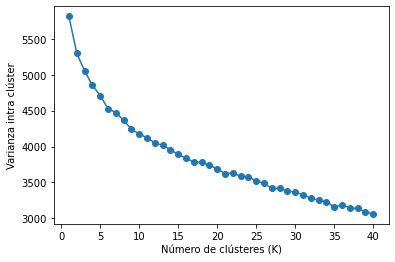

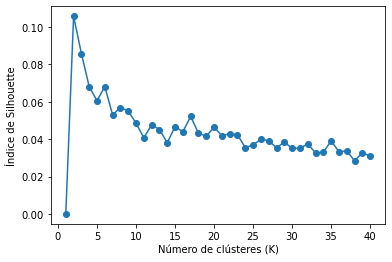

Para el método del codo---------------------------------------------------
Clusters: 1 Diff : -5813.819751087902
Clusters: 2 Diff : 512.9677749516377
Clusters: 3 Diff : 246.6935211581531
Clusters: 4 Diff : 198.94465417004085
Clusters: 5 Diff : 144.748784469145
Clusters: 6 Diff : 182.05431566915104
Clusters: 7 Diff : 54.77821610205501
Clusters: 8 Diff : 108.39563252623157
Clusters: 9 Diff : 121.27139066197378
Clusters: 10 Diff : 70.37024624357582
Clusters: 11 Diff : 51.18908736733283
Clusters: 12 Diff : 69.95368026546657
Clusters: 13 Diff : 35.77896092370884
Clusters: 14 Diff : 59.29397822066403
Clusters: 15 Diff : 67.28496917043185
Clusters: 16 Diff : 51.86184205374957
Clusters: 17 Diff : 52.843857565954295
Clusters: 18 Diff : 3.889870171477469
Clusters: 19 Diff : 41.062963295870304
Clusters: 20 Diff : 49.546404002872805
Clusters: 21 Diff : 66.46328562526924
Clusters: 22 Diff : -7.9672314251833996
Clusters: 23 Diff : 46.665039952648385
Clusters: 24 Diff : 9.27528438472018
Clusters: 25 

In [13]:
!pip install scikit-learn-extra
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids 
import matplotlib.pyplot as plt


Y = {}
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 41): # Evaluamos entre 1 a 40 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123).fit(pca_dt)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(pca_dt, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

plt.plot(range(1, 41), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

plt.plot(range(1, 41), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

#Obtención del número correcto

#El método del codo escoge como óptimo aquel valor a partir del cual añadir más clusters apenas consigue mejoría.
print('Para el método del codo---------------------------------------------------')
varianza_intra_cluster
counter = 1 
reference = 0
for x in varianza_intra_cluster:
  print('Clusters: '+ str(counter) + ' Diff : ' +str(reference-x))
  reference = x
  counter += 1 

#Se considera como número óptimo de clusters aquel que maximiza la media del coeficiente de todas las observaciones.
index_max = np.argmax(silhouettes)

print('RESULTADOS ---------------------------------------------------------------')
print('Varianza intra clúster, # óptimo de clústeres :' + str(3))
print('Índice de Silhouette, # óptimo de clústeres :' + str(index_max+1))

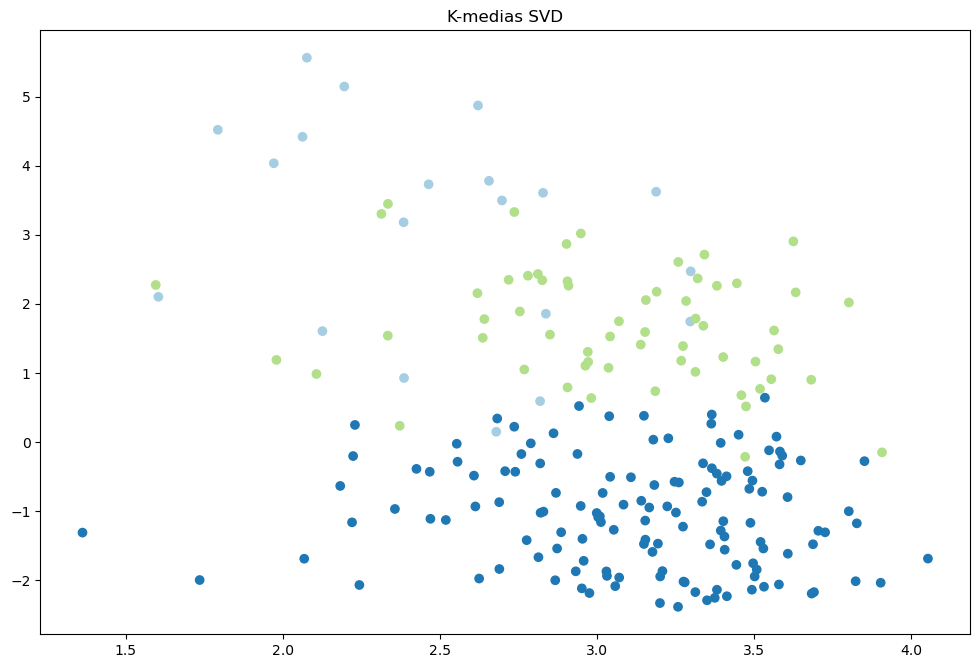

Text(0.5, 1.0, 'K-medias PCA')

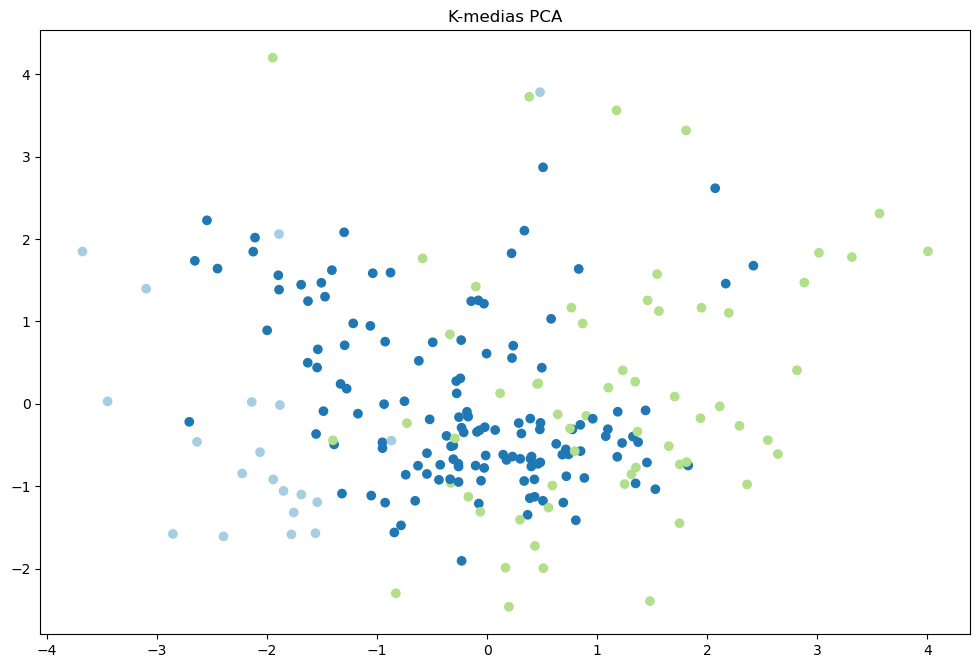

In [14]:
#Proceso de K-means------------------------------------------------------
#!pip install scikit-learn-extraplt.show()
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#SVD----------------------------------------------------------------------------
#Implementación de K-medias
kmeans = KMeans(n_clusters = 3, random_state = 1234).fit_predict(df_reduced_data)

#Gráfica
u_labels = np.unique(kmeans)
#plotting the results:
color = [sns.color_palette("Paired", 3)[k] for k in kmeans]
fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
ax.scatter(df_reduced_data['C1'], df_reduced_data['C2'], c = color)
ax.set_title("K-medias SVD")
plt.show()

#PCA-----------------------------------------------------------------------
#Implementación de K-medias
kmeans_pca = KMeans(n_clusters = 3, random_state = 1234).fit_predict(pca_dt)

#Gráfica
u_labels = np.unique(kmeans_pca)
#plotting the results:
color = [sns.color_palette("Paired", 4)[k] for k in kmeans_pca]
fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
ax.scatter(pca_dt['CP1'], pca_dt['CP2'], c = color)
ax.set_title("K-medias PCA")


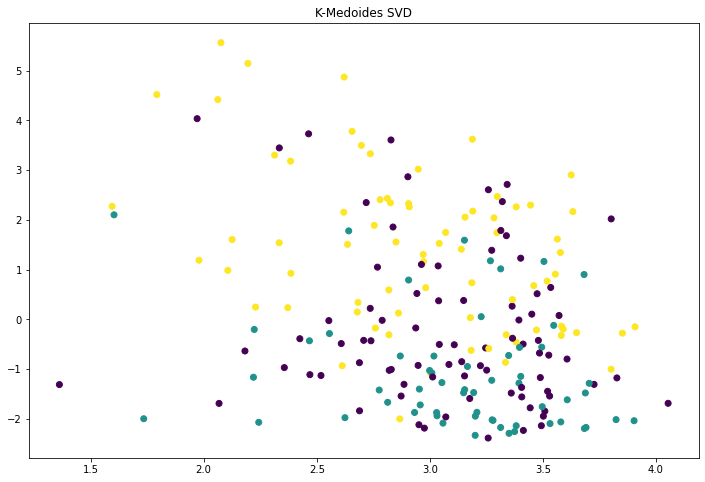

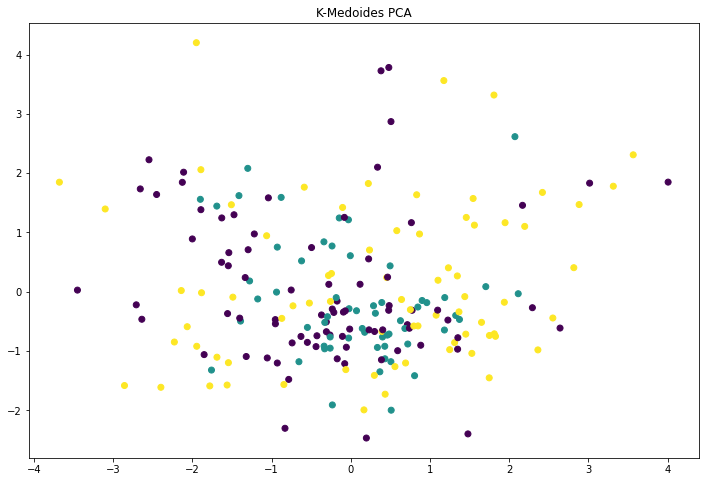

In [15]:
#Proceso de K-medoides------------------------------------------------------
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids 

#SVD----------------------------------------------------------------------------
#Implementación de K-medoides
medoides = KMedoids(n_clusters = 3, random_state = 1234).fit(df_reduced_data)

#Indices 
m_labels = medoides.labels_

#Gráfica
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_reduced_data['C1'], df_reduced_data['C2'], c = m_labels)
ax.set_title("K-Medoides SVD")
plt.show()

#PCA-----------------------------------------------------------------------
#Implementación de K-medoides
medoides = KMedoids(n_clusters = 3, random_state = 1234).fit(pca_dt)

#Indices 
m_labels_pca = medoides.labels_

#Gráfica
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(pca_dt['CP1'], pca_dt['CP2'], c = m_labels_pca)
ax.set_title("K-Medoides PCA")
plt.show()


In [16]:
df_procesado = contenido.copy()
df_procesado = df_procesado.drop(['ID','ID_Consutoriamigo','APERTURA_DT','FECHA_ENCUESTA','BASE',],axis=1)
df_procesado ['K-MEDIAS'] = kmeans_pca
df_procesado ['K-MEDOIDES'] = m_labels_pca
display(df_procesado[['EDAD','GENERO','ESTRATO','ACTIVIDAD_ECONOMICA','ESTADO_CIVIL','RANGO EDAD','K-MEDIAS','K-MEDOIDES']])

EDAD     GENERO  ESTRATO ACTIVIDAD_ECONOMICA ESTADO_CIVIL RANGO EDAD  \
0      24  MASCULINO        3    EMPLEADO_PRIVADO    SOLTERO/A    21 - 30   
1      29  MASCULINO        3    EMPLEADO_PRIVADO    SOLTERO/A    21 - 30   
2      29  MASCULINO        3       INDEPENDIENTE    SOLTERO/A    21 - 30   
3      27  MASCULINO        3    EMPLEADO_PRIVADO    SOLTERO/A    21 - 30   
4      28  MASCULINO        3       INDEPENDIENTE    SOLTERO/A    21 - 30   
..    ...        ...      ...                 ...          ...        ...   
210    47  MASCULINO        3    EMPLEADO_PRIVADO    SOLTERO/A    41 - 50   
211    43  MASCULINO        4    EMPLEADO_PRIVADO    SOLTERO/A    41 - 50   
212    51   FEMENINO        3       INDEPENDIENTE    SOLTERO/A    51 - 60   
213    67  MASCULINO        5          PENSIONADO     CASADO/A   MAYOR 60   
214    65  MASCULINO        3         COMERCIANTE     CASADO/A   MAYOR 60   

     K-MEDIAS  K-MEDOIDES  
0           1           0  
1           1           0  
2           2           2  
3           1           1  
4           1           1  
..        ...         ...  
210         1           0  
211         2           2  
212         2           0  
213         2           2  
214         0           2  

[215 rows x 8 columns]

### Clustering Jerarquico Aglomerativo:

Analisis dendograma con PCA

--------------------------------------------
Clustering Jerarquico
--------------------------------------------
Agrupando los clientes solo con dos variables
        CP0       CP1       CP2       CP3       CP4       CP5       CP6  \
0 -2.181086 -0.308248 -0.672692 -0.845361  0.752912 -0.587134 -0.121810   
1 -2.352410  0.478234 -0.311480 -0.240391  0.076738 -0.690556  0.392193   
2  1.417871  1.650175 -0.514682 -1.840676  0.577689  1.737232  0.224251   
3 -1.921158 -1.411928  1.621693 -1.831321  0.425930  0.210489  0.835236   
4 -1.578159  1.324339 -0.398516 -0.895108  0.626290  0.082999  0.461599   

        CP7       CP8       CP9  ...      CP51      CP52      CP53      CP54  \
0 -0.000063  1.138735  0.647521  ... -0.039386  0.805453 -0.441353 -0.573505   
1 -0.310092  0.987745 -0.557997  ...  0.159088 -0.270813  0.118940  0.225931   
2  0.588831 -0.864657  1.546579  ...  0.869317 -0.485892  0.104554 -0.446322   
3  0.465741 -0.090394  0.807456  ...  0.478360 -0.538451 -0.303996 -0.1

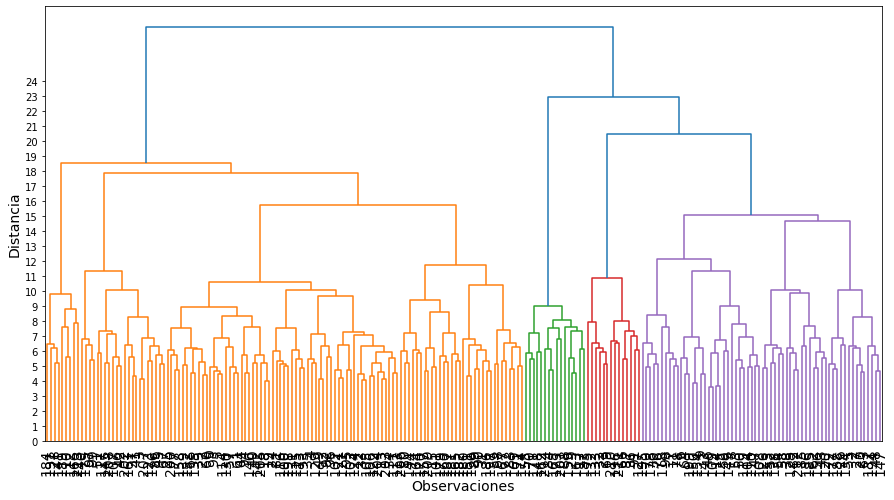

In [17]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, fcluster

print('--------------------------------------------')
print('Clustering Jerarquico')

print('--------------------------------------------')
print('Agrupando los clientes solo con dos variables')
#pca_dendograma=pca_dt[["CP1","CP2"]]
print(pca_dt.head())

print('--------------------------------------------')
print('Construcción del dendograma')

dist = pdist(pca_dt, metric='euclidean')
Z = linkage(dist, method='ward')

fig, ax = plt.subplots(figsize=(15, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 25, 1))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

cluster_PCA=fcluster(Z,t=19,criterion='distance')

Modificando los parametros para el endograma:

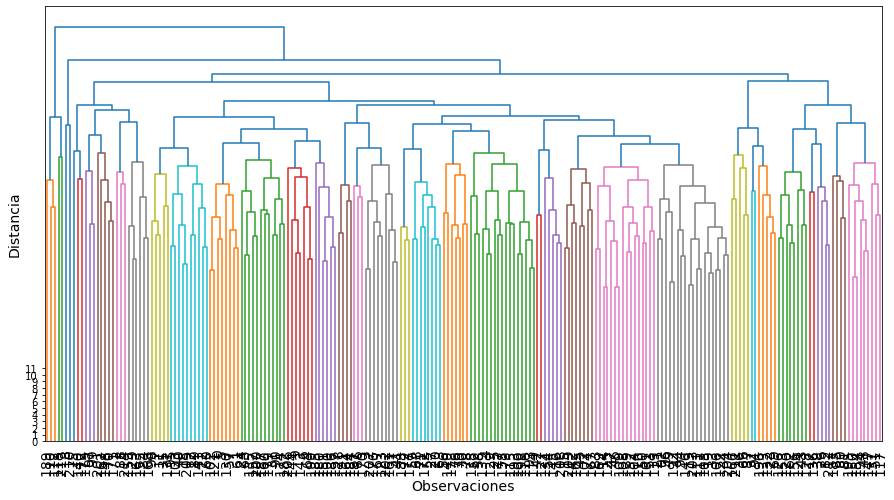

In [18]:
dist = pdist(pca_dt, metric='cityblock')
Z = linkage(dist, method='complete')

fig, ax = plt.subplots(figsize=(15, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 12, 1))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

Analisis dendograma con SVD

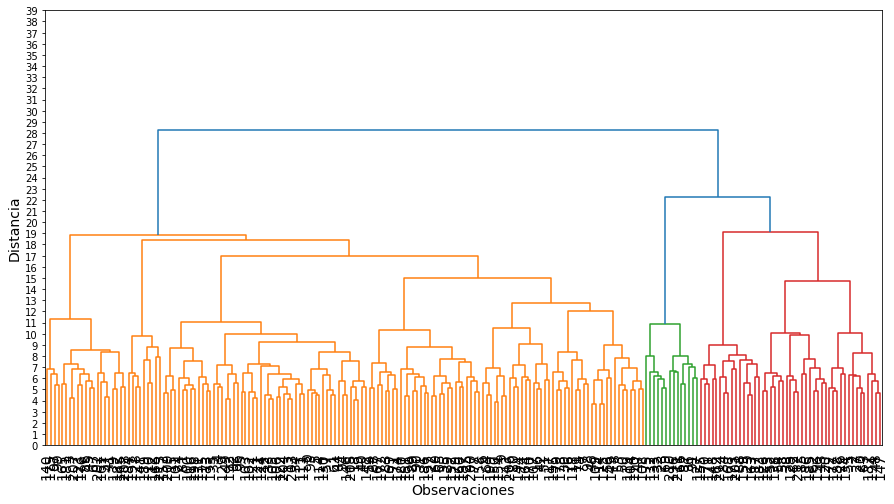

In [19]:
dist = pdist(df_reduced_data, metric='euclidean')
Z = linkage(dist, method='ward')

fig, ax = plt.subplots(figsize=(15, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 40, 1))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

cluster_SVD=fcluster(Z,t=21,criterion='distance')

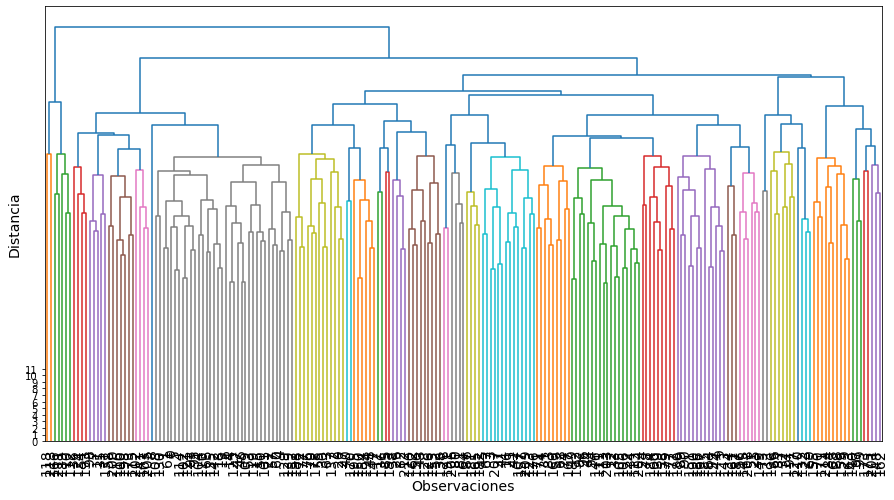

In [20]:
dist = pdist(df_reduced_data, metric='cityblock')
Z = linkage(dist, method='complete')

fig, ax = plt.subplots(figsize=(15, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 12, 1))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

Visualización resultados clustering jerarquico:

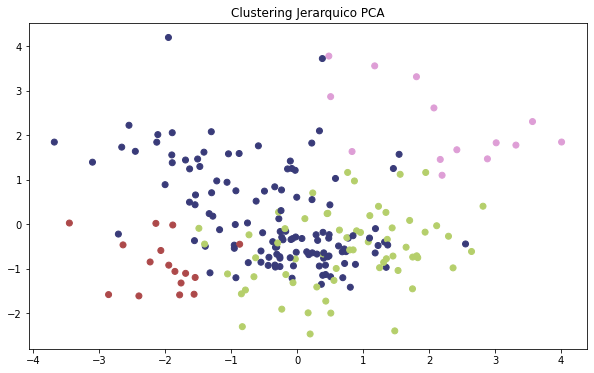

In [21]:
from sklearn.cluster import AgglomerativeClustering

cluster_sk_PCA = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_sk_PCA =cluster_sk_PCA.fit_predict(pca_dt)

plt.figure(figsize=(10,6))
plt.scatter(pca_dt["CP1"], pca_dt["CP2"], c=cluster_sk_PCA, cmap='tab20b')
plt.title("Clustering Jerarquico PCA")
plt.show()

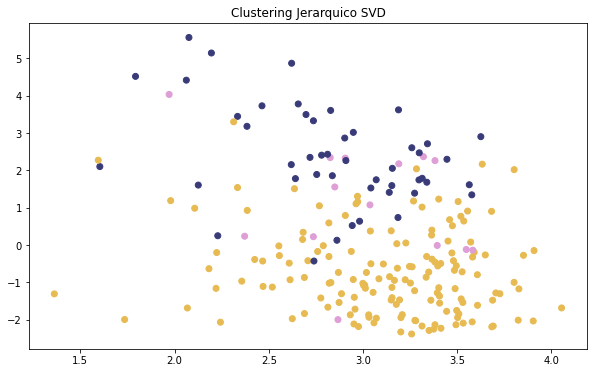

In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster_sk_SVD = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_sk_SVD =cluster_sk_SVD.fit_predict(df_reduced_data)

plt.figure(figsize=(10,6))
plt.scatter(df_reduced_data["C1"], df_reduced_data["C2"], c=cluster_sk_SVD, cmap='tab20b')
plt.title("Clustering Jerarquico SVD")
plt.show()

In [23]:
df_procesado = contenido.copy()
df_procesado = df_procesado.drop(['ID','ID_Consutoriamigo','APERTURA_DT','FECHA_ENCUESTA','BASE',],axis=1)
df_procesado ['K-MEDIAS'] = kmeans_pca
df_procesado ['K-MEDOIDES'] = m_labels_pca
df_procesado ['CJA_PCA'] = cluster_sk_PCA
df_procesado ['CJA_SVD'] = cluster_sk_SVD
display(df_procesado[['EDAD','GENERO','ESTRATO','ACTIVIDAD_ECONOMICA','ESTADO_CIVIL','RANGO EDAD','K-MEDIAS','K-MEDOIDES','CJA_PCA','CJA_SVD']])

EDAD     GENERO  ESTRATO ACTIVIDAD_ECONOMICA ESTADO_CIVIL RANGO EDAD  \
0      24  MASCULINO        3    EMPLEADO_PRIVADO    SOLTERO/A    21 - 30   
1      29  MASCULINO        3    EMPLEADO_PRIVADO    SOLTERO/A    21 - 30   
2      29  MASCULINO        3       INDEPENDIENTE    SOLTERO/A    21 - 30   
3      27  MASCULINO        3    EMPLEADO_PRIVADO    SOLTERO/A    21 - 30   
4      28  MASCULINO        3       INDEPENDIENTE    SOLTERO/A    21 - 30   
..    ...        ...      ...                 ...          ...        ...   
210    47  MASCULINO        3    EMPLEADO_PRIVADO    SOLTERO/A    41 - 50   
211    43  MASCULINO        4    EMPLEADO_PRIVADO    SOLTERO/A    41 - 50   
212    51   FEMENINO        3       INDEPENDIENTE    SOLTERO/A    51 - 60   
213    67  MASCULINO        5          PENSIONADO     CASADO/A   MAYOR 60   
214    65  MASCULINO        3         COMERCIANTE     CASADO/A   MAYOR 60   

     K-MEDIAS  K-MEDOIDES  CJA_PCA  CJA_SVD  
0           1           0        0        1  
1           1           0        0        1  
2           2           2        1        0  
3           1           1        0        1  
4           1           1        0        1  
..        ...         ...      ...      ...  
210         1           0        3        2  
211         2           2        3        2  
212         2           0        1        0  
213         2           2        0        1  
214         0           2        2        0  

[215 rows x 10 columns]

In [24]:
df_procesado = clean_df.copy()
df_procesado ['K-MEDIAS'] = kmeans_pca
df_procesado ['K-MEDOIDES'] = m_labels_pca
df_procesado ['CJA_PCA'] = cluster_sk_PCA
df_procesado ['CJA_SVD'] = cluster_sk_SVD
display(df_procesado[['EDAD','ESTRATO',"Web B Tibamoa","App B Tibamoa","Banca en linea B Tibamoa","Chat WhatsApp B Tibamoa","Telefono B Tibamoa",
"Cajeros electronicos","Oficinas B Tibamoa","Correo electronico B Tibamoa",'Probabilidad_Recomendacion','K-MEDIAS','K-MEDOIDES','CJA_PCA','CJA_SVD']])

EDAD  ESTRATO  Web B Tibamoa  App B Tibamoa  Banca en linea B Tibamoa  \
0      24        3             10             10                        10   
1      29        3             10             10                        10   
2      29        3            -99             10                       -99   
3      27        3              1              1                         1   
4      28        3             10             10                        10   
..    ...      ...            ...            ...                       ...   
210    47        3             10             10                        10   
211    43        4              4              5                         5   
212    51        3            -99              8                       -99   
213    67        5              1             10                       -99   
214    65        3            -99            -99                       -99   

     Chat WhatsApp B Tibamoa  Telefono B Tibamoa  Cajeros electronicos  \
0                         10                  10                    10   
1                         10                  10                    10   
2                          9                 -99                    10   
3                          1                   1                     1   
4                         10                 -99                    10   
..                       ...                 ...                   ...   
210                        5                 -99                    10   
211                        7                 -99                     8   
212                      -99                  10                     8   
213                      -99                 -99                   -99   
214                      -99                 -99                     9   

     Oficinas B Tibamoa  Correo electronico B Tibamoa  \
0                    10                            10   
1                    10                            10   
2                     9                           -99   
3                     1                             1   
4                    10                            10   
..                  ...                           ...   
210                 -99                           -99   
211                 -99                           -99   
212                   9                             8   
213                   1                           -99   
214                   9                           -99   

     Probabilidad_Recomendacion  K-MEDIAS  K-MEDOIDES  CJA_PCA  CJA_SVD  
0                            10         1           0        0        1  
1                            10         1           0        0        1  
2                             9         2           2        1        0  
3                             0         1           1        0        1  
4                            10         1           1        0        1  
..                          ...       ...         ...      ...      ...  
210                           5         1           0        3        2  
211                           8         2           2        3        2  
212                           9         2           0        1        0  
213                          10         2           2        0        1  
214                           9         0           2        2        0  

[215 rows x 15 columns]

In [25]:

for r in rep:
  df_procesado[r].mask(df_procesado[r] == -99, 7, inplace=True)
  df_procesado[r].mask(df_procesado[r] == -98, 7, inplace=True)

In [26]:
display(df_procesado[['EDAD','ESTRATO',"Web B Tibamoa","App B Tibamoa","Banca en linea B Tibamoa","Chat WhatsApp B Tibamoa","Telefono B Tibamoa",
"Cajeros electronicos","Oficinas B Tibamoa","Correo electronico B Tibamoa",'Probabilidad_Recomendacion','K-MEDIAS','K-MEDOIDES','CJA_PCA','CJA_SVD']])


EDAD  ESTRATO  Web B Tibamoa  App B Tibamoa  Banca en linea B Tibamoa  \
0      24        3             10             10                        10   
1      29        3             10             10                        10   
2      29        3              7             10                         7   
3      27        3              1              1                         1   
4      28        3             10             10                        10   
..    ...      ...            ...            ...                       ...   
210    47        3             10             10                        10   
211    43        4              4              5                         5   
212    51        3              7              8                         7   
213    67        5              1             10                         7   
214    65        3              7              7                         7   

     Chat WhatsApp B Tibamoa  Telefono B Tibamoa  Cajeros electronicos  \
0                         10                  10                    10   
1                         10                  10                    10   
2                          9                   7                    10   
3                          1                   1                     1   
4                         10                   7                    10   
..                       ...                 ...                   ...   
210                        5                   7                    10   
211                        7                   7                     8   
212                        7                  10                     8   
213                        7                   7                     7   
214                        7                   7                     9   

     Oficinas B Tibamoa  Correo electronico B Tibamoa  \
0                    10                            10   
1                    10                            10   
2                     9                             7   
3                     1                             1   
4                    10                            10   
..                  ...                           ...   
210                   7                             7   
211                   7                             7   
212                   9                             8   
213                   1                             7   
214                   9                             7   

     Probabilidad_Recomendacion  K-MEDIAS  K-MEDOIDES  CJA_PCA  CJA_SVD  
0                            10         1           0        0        1  
1                            10         1           0        0        1  
2                             9         2           2        1        0  
3                             0         1           1        0        1  
4                            10         1           1        0        1  
..                          ...       ...         ...      ...      ...  
210                           5         1           0        3        2  
211                           8         2           2        3        2  
212                           9         2           0        1        0  
213                          10         2           2        0        1  
214                           9         0           2        2        0  

[215 rows x 15 columns]

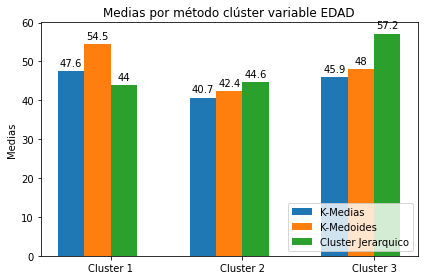

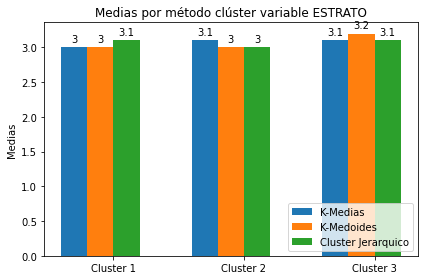

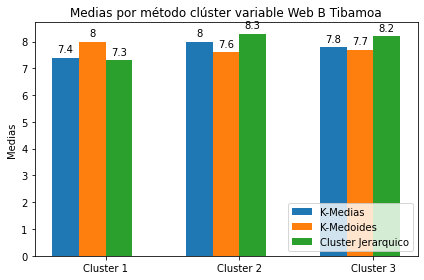

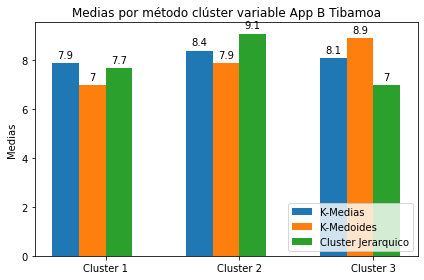

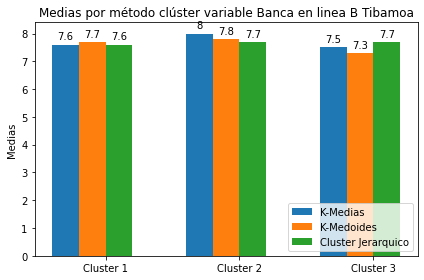

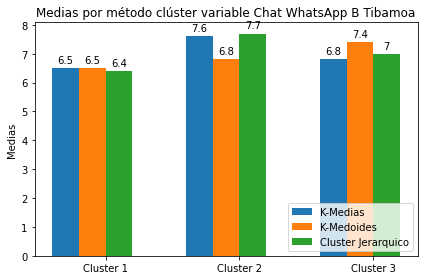

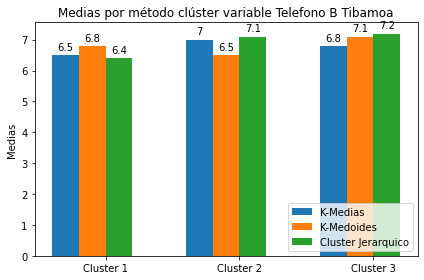

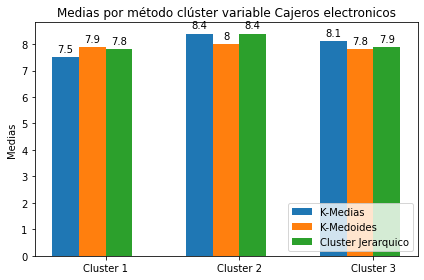

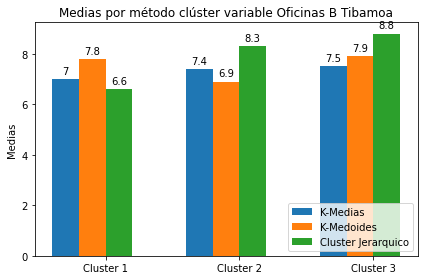

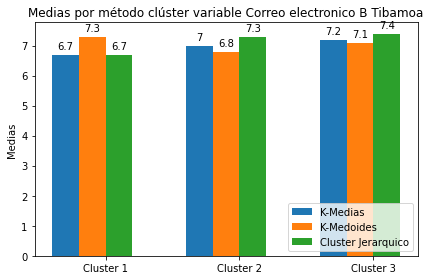

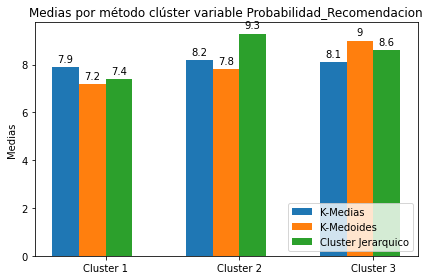

In [27]:
items=['K-MEDIAS','K-MEDOIDES','CJA_PCA']
variables=['EDAD','ESTRATO',"Web B Tibamoa","App B Tibamoa","Banca en linea B Tibamoa","Chat WhatsApp B Tibamoa","Telefono B Tibamoa",
"Cajeros electronicos","Oficinas B Tibamoa","Correo electronico B Tibamoa",'Probabilidad_Recomendacion']

for n in variables:
    k_medoides_means = []
    k_medias_means = []
    CJ_means =[]
    for i in range(0,3):
        k_medoides_means.append(round(df_procesado[n].loc[df_procesado['K-MEDIAS'] == i].mean(),1))
        k_medias_means.append(round(df_procesado[n].loc[df_procesado['K-MEDOIDES'] == i].mean(),1))
        CJ_means.append(round(df_procesado[n].loc[df_procesado['CJA_PCA'] == i].mean(),1))
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

    x = np.arange(len(labels))  # the label locations
    width = 0.20  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - (width/2)*3, k_medias_means, width, label='K-Medias')
    rects2 = ax.bar(x - width/2, k_medoides_means, width, label='K-Medoides')
    rects3 = ax.bar(x + width/2, CJ_means, width, label='Cluster Jerarquico')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Medias')
    ax.set_title('Medias por método clúster'+' '+'variable'+' '+str(n))
    ax.set_xticks(x, labels)
    ax.legend(loc='lower right')
    

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)

    fig.tight_layout()

    plt.show()

    
    
    

K-MEDIAS
K-MEDOIDES
CJA_PCA


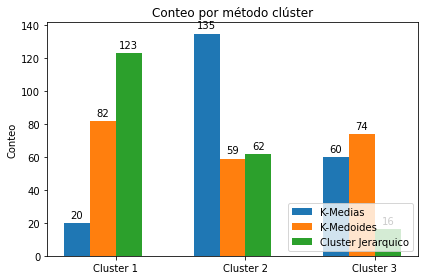

In [28]:
k_medoides_cuenta = []
k_medias_cuenta = []
CJ_cuenta =[]
for n in items:
    print(n)
    for j in range (0,3):
        if n=='K-MEDIAS':
            k_medias_cuenta.append(df_procesado[n].loc[df_procesado[n] == j].count())
        elif n=='K-MEDOIDES':
            k_medoides_cuenta.append(df_procesado[n].loc[df_procesado[n] == j].count())
        elif n=='CJA_PCA':
            CJ_cuenta.append(df_procesado[n].loc[df_procesado[n] == j].count())
            


x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2)*3, k_medias_cuenta, width, label='K-Medias')
rects2 = ax.bar(x - width/2, k_medoides_cuenta, width, label='K-Medoides')
rects3 = ax.bar(x + width/2, CJ_cuenta, width, label='Cluster Jerarquico')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Conteo')
ax.set_title('Conteo por método clúster')
ax.set_xticks(x, labels)
ax.legend(loc='lower right')
    

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()